# Geometric Transformations

## Affine Transformations

### getAffineTransform

This [function](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=resize#getaffinetransform) calculates an affine transform from three pairs of the corresponding points.

```Python
cv2.getAffineTransform(Source, Destination) → retval
```

Parameters:	
* Source – Coordinates of triangle vertices in the source image.
* Destination – Coordinates of the corresponding triangle vertices in the destination image.

The function calculates the $2 \times 3$ matrix 

$$\begin{bmatrix} M_{11} & M_{12} & M_{13} \\M_{21} & M_{22} & M_{23}  \end{bmatrix}$$

### Image Wrap
Calculates a Applies an [affine transformation](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=warpaffine#warpaffine) to an image.

\begin{equation}
\begin{bmatrix}
x'_i \\ y'_i \end{bmatrix} = 
\begin{bmatrix} M_{11} & M_{12} & M_{13} \\M_{21} & M_{22} & M_{23}  \end{bmatrix}\begin{bmatrix} x_i \\ y_i \\ 1 \end{bmatrix}
\end{equation}

We can define a map function as follows
\begin{equation}
\text{map_matrix}(t_x, t_y) = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y  \end{bmatrix}
\end{equation}

<font color='Blue'><b>Example</b></font>:

We use the sklearn [image dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) to demonstrate basic operations using Open CV.

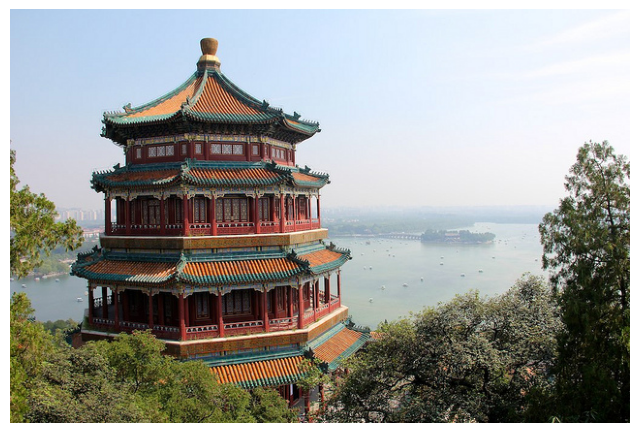

In [1]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

Img = load_sample_image('china.jpg')
fig, ax = plt.subplots(1, 1 , figsize = (8, 6))
font = FontProperties()
font.set_weight('bold')
_ = ax.imshow(Img)
_ = ax.axis('off')
_ = ax.set_aspect(1)

Here is a breakdown of the code:

1. Importing the necessary libraries:
   - `from sklearn.datasets import load_sample_image`: This imports the function `load_sample_image` from the scikit-learn library, which is used to load sample images.
   - `import matplotlib.pyplot as plt`: This imports the `pyplot` module from the matplotlib library, which provides functions for creating plots and visualizations.
   - `from matplotlib.font_manager import FontProperties`: This imports the `FontProperties` class from the `font_manager` module in matplotlib, which is used to modify the font properties of the plot.

2. Loading the sample image:
   - `Img = load_sample_image('china.jpg')`: This line loads a sample image named 'china.jpg' using the `load_sample_image` function from scikit-learn. The image is stored in the variable `Img`.

3. Creating the plot:
   - `fig, ax = plt.subplots(1, 1 , figsize = (8, 6))`: This line creates a figure and a set of subplots. It creates a single subplot (`1, 1`) and sets the figure size to 8 inches by 6 inches. The figure object is stored in the variable `fig`, and the axes object (plot) is stored in the variable `ax`.

4. Modifying the font properties:
   - `font = FontProperties()`: This line creates a `FontProperties` object, which is used to modify the font properties of the plot.
   - `font.set_weight('bold')`: This sets the font weight to bold using the `set_weight` method of the `FontProperties` object.

5. Displaying the image:
   - `_ = ax.imshow(Img)`: This line displays the image on the plot axes (`ax`) using the `imshow` function. The image data stored in the variable `Img` is passed as the argument.
   - `_ = ax.axis('off')`: This line turns off the axis labels and ticks on the plot axes.
   - `_ = ax.set_aspect(1)`: This line sets the aspect ratio of the image to 1, ensuring that the image is displayed without distortion.

Overall, this code loads the 'china.jpg' sample image, creates a plot with a single subplot, displays the image on the plot without axis labels and ticks, and sets the aspect ratio of the image to 1.

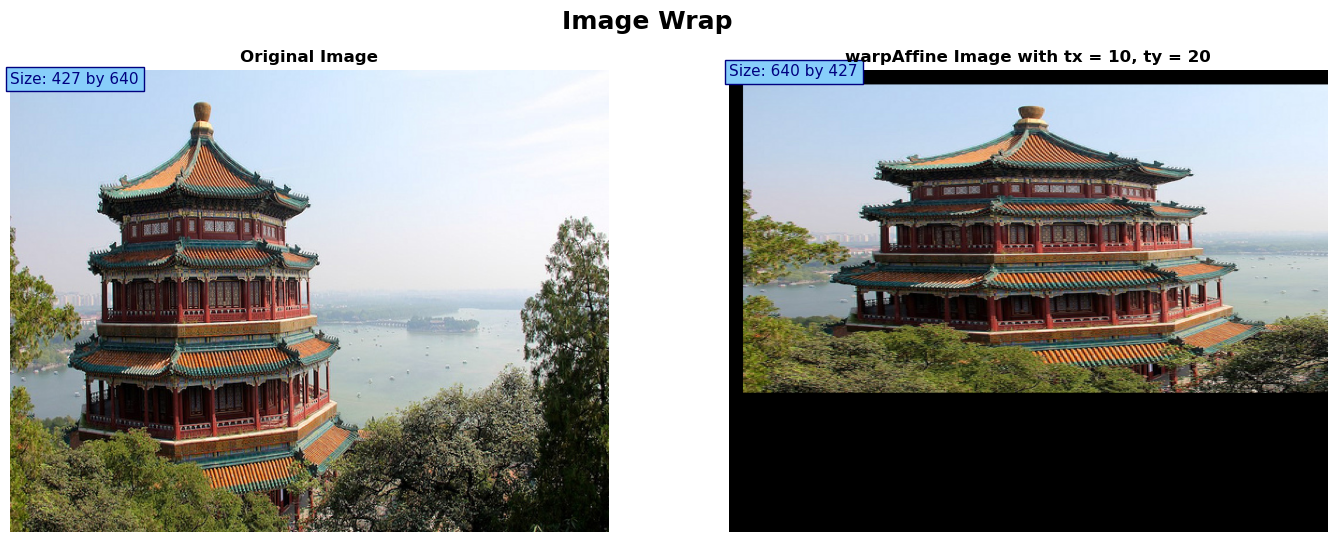

In [2]:
import numpy as np
def map_matrix(tx, ty):
    M = np.eye(3, dtype=float)[:2,:]
    M[:,-1] = [tx, ty]
    return M

import cv2
Out = cv2.warpAffine(Img, map_matrix(10,20) , Img.shape[:2])

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Image Wrap', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('warpAffine Image with tx = 10, ty = 20', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
_ = ax[0].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
_ = ax[1].text(x = 0, y = int(0.02*Out.shape[1]), s = 'Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

This code performs the following tasks:

1. The code starts by importing the necessary libraries:
   - `numpy` is imported as `np` to perform numerical operations on arrays.
   - `cv2` is imported to access the computer vision functions of OpenCV.
   - `matplotlib.pyplot` is imported as `plt` to plot and visualize the images.

2. The code defines a function called `map_matrix(tx, ty)`. This function creates an affine transformation matrix based on the provided translation values `tx` and `ty`. The affine transformation matrix is a 3x3 matrix used to transform images. In this case, the function constructs a 2x3 matrix by taking the first two rows of the identity matrix and setting the last column to `[tx, ty]`. The function then returns this matrix.

3. The code uses the `cv2.warpAffine()` function to warp the image `Img` using the affine transformation matrix generated by `map_matrix(10, 20)`. The `warpAffine()` function applies the specified affine transformation to the image. The resulting warped image is assigned to the variable `Out`.

4. The code creates a figure and subplots using `plt.subplots()`. It sets the figure size to `(17, 6)`.

5. The variable `ax` is assigned to the two subplots created by `ax = ax.ravel()`. This allows accessing each subplot individually.

6. The code sets the title of the figure using `fig.suptitle()`.

7. The code plots the original image `Img` on `ax[0]` using `ax[0].imshow()`. It sets the title of this subplot as "Original Image".

8. The code plots the warped image `Out` on `ax[1]` using `ax[1].imshow()`. It sets the title of this subplot as "warpAffine Image with tx = 10, ty = 20".

9. A loop runs for each subplot to set the aspect ratio to "auto" and turn off the axes.

10. The code adds text to `ax[0]` and `ax[1]` to display the size of the original and warped images, respectively. The size information is extracted from the shape of the images using `Img.shape` and `Out.shape`.

11. Finally, the variable `i` is deleted, and the plot is displayed using `plt.show()`.

Overall, this code demonstrates how to use OpenCV to warp images using an affine transformation matrix and visualizes the original and warped images side by side using matplotlib.

<font color='Blue'><b>Example</b></font>:

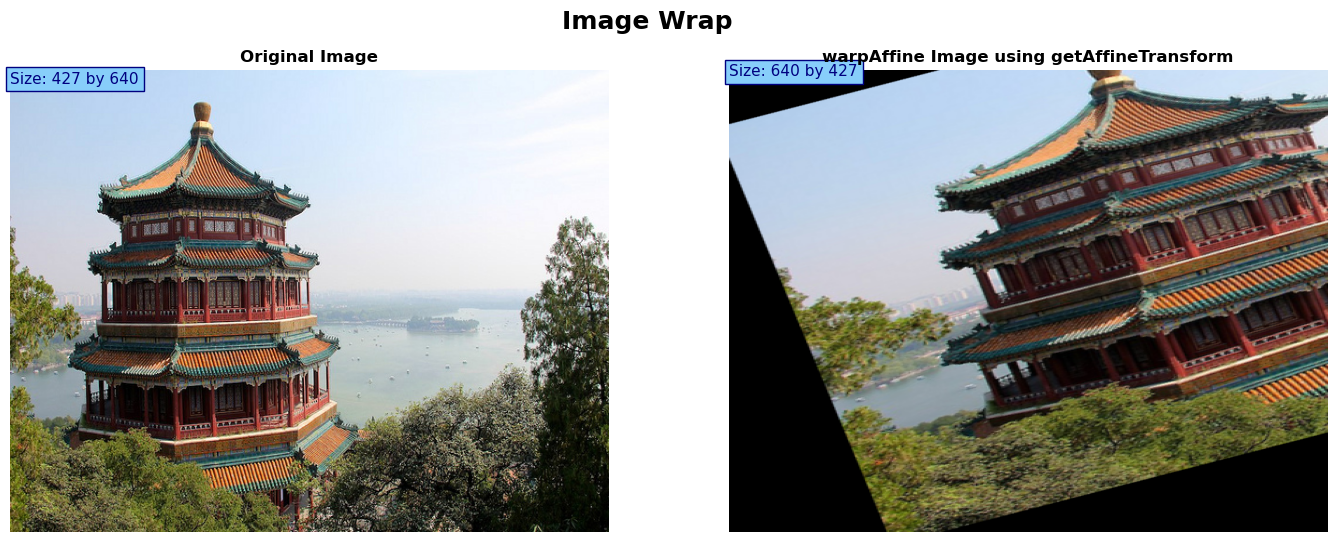

In [3]:
pts1 = np.float32([[10, 20], [150, 50], [50, 150]]) 
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])   
M = cv2.getAffineTransform(pts1, pts2) 
del pts1, pts2

Out = cv2.warpAffine(Img, M, Img.shape[:2]) 

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Image Wrap', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('warpAffine Image using getAffineTransform', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
_ = ax[0].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
_ = ax[1].text(x = 0, y = int(0.02*Out.shape[1]), s = 'Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

This code performs the following tasks:

1. `pts1` and `pts2` are two sets of three points defined as NumPy arrays. Each point represents the coordinates (x, y) in the image plane. These points are used to define the source and destination coordinates for the transformation.

2. The `cv2.getAffineTransform()` function takes `pts1` and `pts2` as input and calculates the affine transformation matrix `M`. This matrix defines the relationship between the source and destination points and is necessary for the transformation.

3. After obtaining the transformation matrix `M`, `pts1` and `pts2` are deleted to free up memory.

4. The `cv2.warpAffine()` function is used to apply the affine transformation to the image `Img`. The resulting transformed image is stored in the variable `Out`. The `Img.shape[:2]` is used to extract the dimensions (height and width) of the image.

5. The code then creates a matplotlib figure with two subplots, `fig` and `ax`, to display the original image and the transformed image side by side.

6. The original image `Img` is displayed in the first subplot (`ax[0]`) using `imshow()` function, and a title is set for this subplot.

7. The transformed image `Out` is displayed in the second subplot (`ax[1]`) using `imshow()` function, and a title is set for this subplot.

8. A loop is used to iterate over both subplots to set their aspect ratio to 'auto' and turn off the axes.

9. Text annotations are added to both subplots to display the size of the original and transformed images.

In summary, this code applies an affine transformation to an image using the source and destination points defined by `pts1` and `pts2`. It then displays the original and transformed images side by side using matplotlib.

## Resize
[resizing](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=resize#cv2.resize) an image.

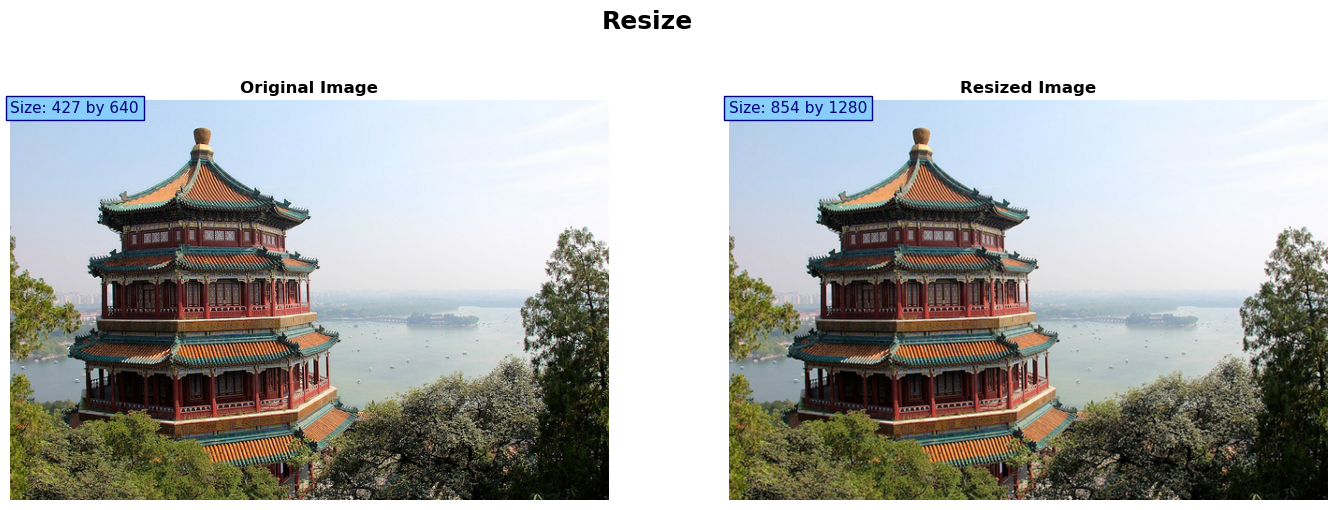

In [4]:
Out = cv2.resize(Img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Resize', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('Resized Image', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i
_ = ax[0].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
_ = ax[1].text(x = 0, y = int(0.02*Out.shape[1]), s = 'Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

This code performs the following tasks:

1. `pts1` and `pts2` are two sets of three points defined as NumPy arrays. Each point represents the coordinates (x, y) in the image plane. These points are used to define the source and destination coordinates for the transformation.

2. The `cv2.getAffineTransform()` function takes `pts1` and `pts2` as input and calculates the affine transformation matrix `M`. This matrix defines the relationship between the source and destination points and is necessary for the transformation.

3. After obtaining the transformation matrix `M`, `pts1` and `pts2` are deleted to free up memory.

4. The `cv2.warpAffine()` function is used to apply the affine transformation to the image `Img`. The resulting transformed image is stored in the variable `Out`. The `Img.shape[:2]` is used to extract the dimensions (height and width) of the image.

5. The code then creates a matplotlib figure with two subplots, `fig` and `ax`, to display the original image and the transformed image side by side.

6. The original image `Img` is displayed in the first subplot (`ax[0]`) using `imshow()` function, and a title is set for this subplot.

7. The transformed image `Out` is displayed in the second subplot (`ax[1]`) using `imshow()` function, and a title is set for this subplot.

8. A loop is used to iterate over both subplots to set their aspect ratio to 'auto' and turn off the axes.

9. Text annotations are added to both subplots to display the size of the original and transformed images.

In summary, this code applies an affine transformation to an image using the source and destination points defined by `pts1` and `pts2`. It then displays the original and transformed images side by side using matplotlib.

## Warp Perspective

Applies a [perspective transformation](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=warpaffine#warpperspective) to an image.

Consider a matrix of a perspective transform

$$M = \begin{bmatrix} M_{11} & M_{12} & M_{13} \\M_{21} & M_{22} & M_{23}  \\M_{31} & M_{32} & M_{33} \end{bmatrix}$$

then
$$
\begin{bmatrix}
x'_i \\ y'_i \end{bmatrix} = 
\begin{bmatrix} \dfrac{M_{11} x + M_{12} y + M_{13}}{M_{31} x + M_{32} y + M_{33}}
\\\dfrac{M_{21} x + M_{22} y + M_{23}}{M_{31} x + M_{32} y + M_{33}}
\end{bmatrix}
$$

also [getPerspectiveTransform](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=getperspectivetransform#getperspectivetransform) calculates a perspective transform from four pairs of the corresponding points.

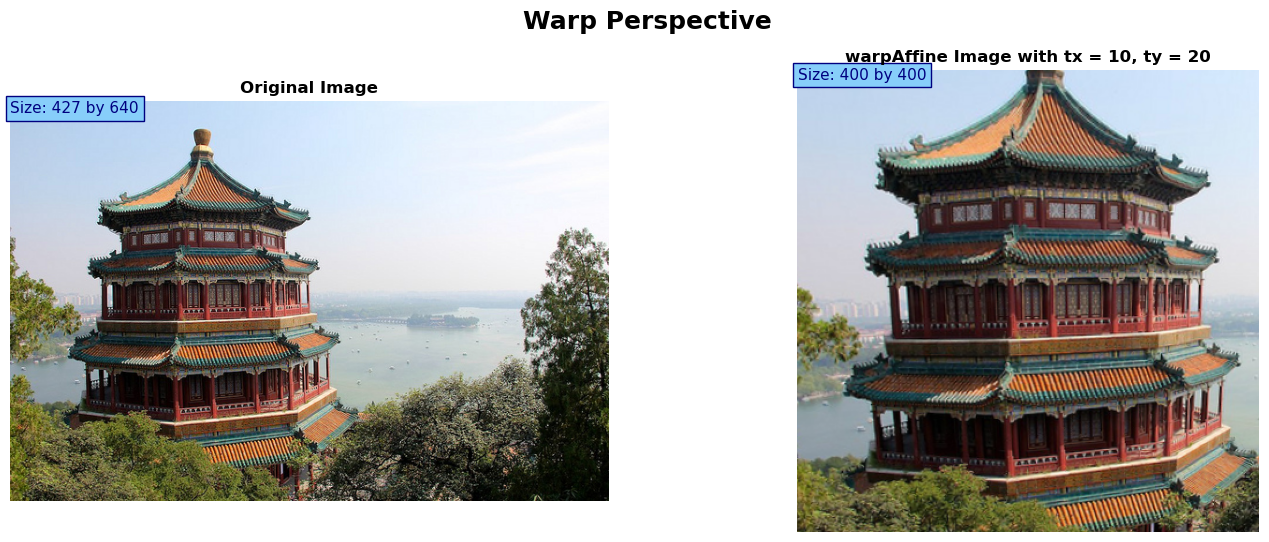

In [5]:
pts1 = np.float32([[50,60],[350, 50],[20, 380],[380, 400]])
pts2 = np.float32([[0,0],[400,0],[0,400],[400,400]])

M = cv2.getPerspectiveTransform(pts1,pts2)
Out = cv2.warpPerspective(Img,M, (400,400))

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Warp Perspective', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('warpAffine Image with tx = 10, ty = 20', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i
_ = ax[0].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
_ = ax[1].text(x = 0, y = int(0.02*Out.shape[1]), s = 'Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

This code performs the following tasks:

1. `pts1` and `pts2` are two sets of four points defined as NumPy arrays. Each point represents the coordinates (x, y) in the image plane. `pts1` represents the four corners of a quadrilateral region in the source image, and `pts2` represents the corresponding four corners of the desired quadrilateral region in the output image after transformation.

2. The `cv2.getPerspectiveTransform()` function takes `pts1` and `pts2` as input and calculates the perspective transformation matrix `M`. This matrix defines the relationship between the source and destination points and is necessary for the transformation.

3. The `cv2.warpPerspective()` function is used to apply the perspective transformation to the image `Img` using the transformation matrix `M`. The resulting transformed image is stored in the variable `Out`. The target size for the output image is specified as (400, 400).

4. The code then creates a matplotlib figure with two subplots, `fig` and `ax`, to display the original image and the transformed image side by side.

5. The original image `Img` is displayed in the first subplot (`ax[0]`) using the `imshow()` function, and a title is set for this subplot.

6. The transformed image `Out` is displayed in the second subplot (`ax[1]`) using the `imshow()` function, and a title is set for this subplot.

7. A loop is used to iterate over both subplots to set their aspect ratio to 1 (so that the image is not distorted) and turn off the axes.

8. Text annotations are added to both subplots to display the size of the original and transformed images.

In summary, this code performs a perspective transformation on an image using the `cv2.getPerspectiveTransform()` and `cv2.warpPerspective()` functions. It then displays the original and transformed images side by side using matplotlib.

## Camera Calibration

Some cheap cameras can introduce the **radial distortion** in which straight lines appear curved. This distortion is solved as follows:
$$
\begin{cases}
x_{corrected} = x (1 + k_1 r^2 + k_2 r^4 + k_3 r^6),\\
y_{corrected} = y (1 + k_1 r^2 + k_2 r^4 + k_3 r^6)
\end{cases}
$$
where $k_1$, $k_2$, and $k_3$ are distortion coefficients.

Another distortion is the **tangential distortion** that can occur due to the lens is not aligned perfectly parallel to the imaging plane. This distortion is solved as follows:

$$
\begin{cases}
x_{corrected} = x + [ 2p_1xy + p_2(r^2+2x^2)], \\
y_{corrected} = y + [ p_1(r^2+ 2y^2)+ 2p_2xy]
\end{cases}
$$
where $p_1$ and $p_2$ are distortion coefficients.


**Undistort** [function](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=resize#undistort) transforms an image to compensate for lens distortion.

```Python
cv2.undistort(Source, cameraMatrix, distCoeffs[, dst[, newCameraMatrix]]) → Destination
```
where 
* **cameraMatrix** is an input camera matrix $\begin{bmatrix} f_x & 0 & c_x\\ 0 & f_y & c_y \\ 0 & 0 & 1\end{bmatrix}$ with focal length $(f_x,f_y)$, and optical centers $(c_x, c_y)$ etc.
* **distCoeffs** is an input vector of distortion coefficients $(k_1, k_2, p_1, p_2[, k_3[, k_4, k_5, k_6]])$ of 4, 5, or 8 elements. If the vector is NULL/empty, the zero distortion coefficients are assumed.

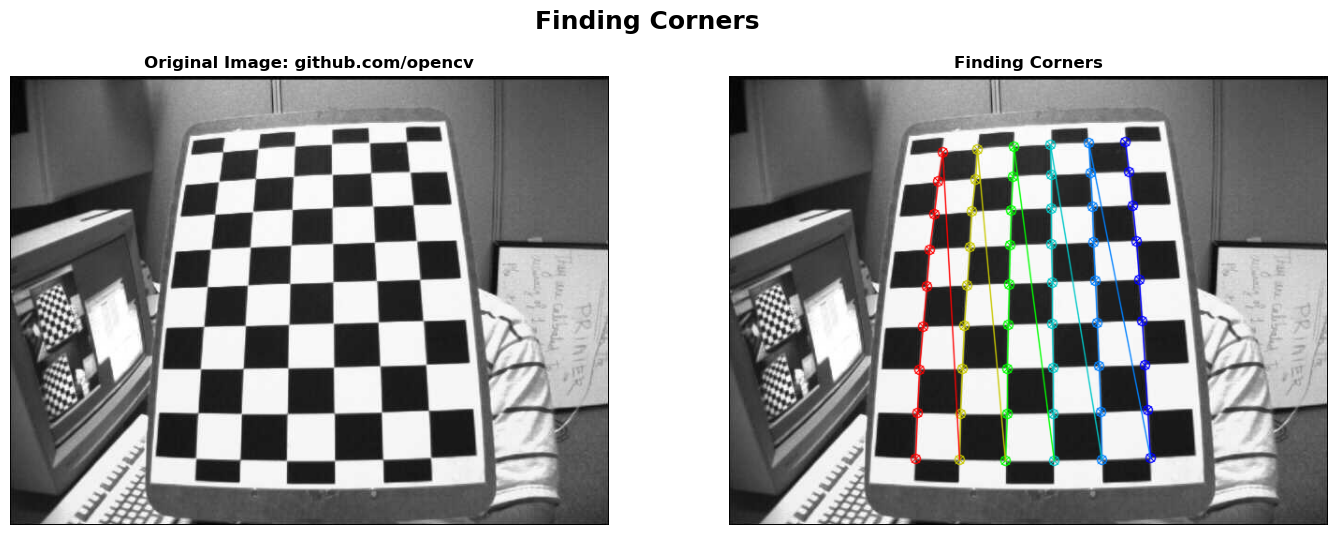

In [6]:
from skimage import io
Img = io.imread('https://github.com/opencv/opencv/blob/fc1a15626226609babd128e043cf7c4e32f567ca/samples/data/left12.jpg?raw=true')
Img = cv2.cvtColor(Img,cv2.COLOR_GRAY2RGB)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Finding Corners', fontproperties=font, fontsize = 18)
# Left Image
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image: github.com/opencv', fontproperties=font, fontsize = 12)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# number of inside corners along x and y directions 
nx = 9
ny = 6
gray = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

# prepare object points
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    objpoints.append(objp)
    
    # Draw and display the corners
    cv2.drawChessboardCorners(Img, (nx, ny), corners, ret)
    _ = ax[1].imshow(Img)
    
    corners2 = cv2.cornerSubPix(gray, corners,(11,11),(-1,-1), criteria)
    imgpoints.append(corners2)
        
_ = ax[1].set_title('Finding Corners', fontproperties=font, fontsize = 12)

for i in range(2):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

This code performs the following tasks:

1. The code begins by importing the necessary libraries. `skimage.io` is imported to read the image from a URL, and `cv2` is imported from OpenCV for various image processing tasks.

2. The image is loaded using `io.imread()` from the provided URL. The image is initially read as a grayscale image.

3. The `cv2.cvtColor()` function is used to convert the grayscale image to RGB format. This is done to ensure that the image is in the correct format for subsequent processing.

4. A matplotlib figure with two subplots, `fig` and `ax`, is created to display the original image and the image with detected corners side by side.

5. The original image `Img` is displayed in the first subplot (`ax[0]`) using `imshow()`, and a title is set for this subplot.

6. The code defines the termination criteria for the corner detection algorithm. The criteria indicate the maximum number of iterations (`cv2.TERM_CRITERIA_MAX_ITER`) and the required accuracy (`cv2.TERM_CRITERIA_EPS`).

7. The code specifies the number of inner corners in the chessboard grid along the x and y directions (`nx` and `ny`, respectively).

8. The grayscale image is calculated by converting `Img` to grayscale using `cv2.cvtColor()`.

9. An object `objp` is created to store the object points in the real-world space. It is a 3D array where each row represents a point in the grid. The `np.mgrid` function is used to generate the grid coordinates.

10. Empty arrays `objpoints` and `imgpoints` are created to store the 3D object points and 2D image points, respectively.

11. The `cv2.findChessboardCorners()` function is used to detect the corners of the chessboard pattern in the grayscale image. The function takes the grayscale image, the grid size (`nx` and `ny`), and `None` as input. It returns a boolean value indicating whether the corners were found and an array of detected corner coordinates.

12. If the corners are found (`ret == True`), the object points (`objp`) are appended to `objpoints`, and the chessboard corners are drawn on the image using `cv2.drawChessboardCorners()`.

13. The modified image with drawn corners is displayed in the second subplot (`ax[1]`).

14. The `cv2.cornerSubPix()` function is called to refine the corner locations with sub-pixel accuracy. It takes the grayscale image, the detected corners, the search window size, and the termination criteria as input. The refined corner coordinates are stored in `corners2`.

15. The refined corner coordinates (`corners2`) are appended to `imgpoints`.

16. A loop is used to iterate over both subplots to set their aspect ratio to 1 and turn off the axes.

In summary, this code loads an image, finds and draws the corners of a chessboard pattern in the image, and displays the original image and the image with detected corners side by side.

For calibration, we can use [cv2.calibrateCamera()](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#calibratecamera) function. It returns the camera matrix, distortion coefficients, rotation and translation vectors etc.

In [7]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

Now using undistort

In [8]:
Img = io.imread('https://github.com/opencv/opencv/blob/fc1a15626226609babd128e043cf7c4e32f567ca/samples/data/left12.jpg?raw=true')
Img = cv2.cvtColor(Img,cv2.COLOR_GRAY2RGB)

h,  w = Img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

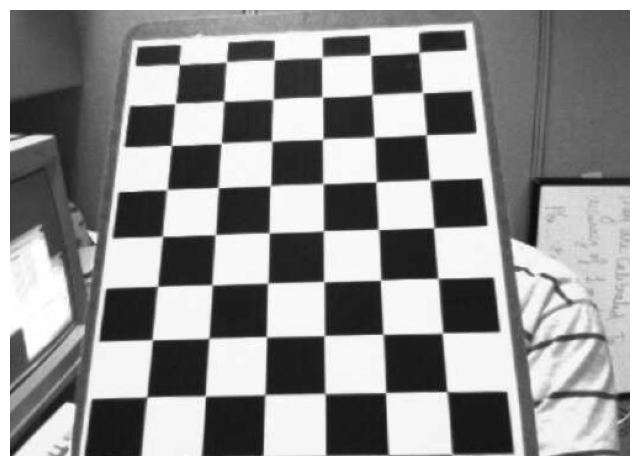

In [9]:
# undistort
mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx,(w,h),5)
dst = cv2.remap(Img, mapx, mapy, cv2.INTER_LINEAR)

# crop the image
x, y, w, h = roi
Out = dst[y:y+h, x:x+w]

fig, ax = plt.subplots(1, 1 , figsize = (8, 6))
_ = ax.imshow(Out)
_ = ax.set_aspect(1)
_ = ax.axis('off')

***

## Refrences
1. [OpenCV documentation](https://docs.opencv.org/2.4/index.html)
2. [OpenCV-Python Tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html#opencv-python-tutorials)
***